# Livrable 1

## Table des matières
- [Introduction](#introduction)
1. [Contraintes](#1-contraintes)
1. [Modélisation](#2-modélisation)
1. [Implémentation](#3-implémentation)
1. [Exploitation](#4-exploitation)
- [Conclusion](#conclusion)

## Introduction

L'ADEME (Agence de l'Environnement et de la Maîtrise de l'Energie) a récemment lancé un appel à manifestation d'intérêt pour promouvoir la réalisation de démonstrations et d'expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.<br><br>
Notre équipe fait partie de la structure CesiCDP déjà implantée dans le domaine et nous avons été mobilisé pour répondre à cet appel.<br><br>
CesiCDP souhaite que l'on oriente l'étude sur la gestion de tournées de livraison. Le problème algorithmique consiste a calculer, sur un réseau routier quelconque, une tournée permettant de relier entre elles un sous-ensemble de villes avec pour but de revenir au point de départ en un minimum de temps.<br><br>
Une méthode algorithme permettrant de répondre a ce problème est attendu.<br><br>
Il est aussi demandé d'ajouter des contraintes supplémentaires afin de rendre le model plus réaliste possible.

## 1. Contraintes

Afin de répondre à l’appel d’offre de l’ADEME, nous avons donc dû identifier les contraintes de notre algorithme.

Notre solution doit :
- Réaliser un cycle permettant de passer par toutes les villes souhaitées,
- Prendre en compte le temps nécessaire pour le passage entre deux villes.

De plus, nous avons opté pour ajouter une contrainte supplémentaire :
- Le temps de parcours d’une arête varie au cours du temps.
Cette contrainte nous a paru pertinente car le temps nécessaire au transit n’est généralement pas le même en fonction de la densité de circulation qui varie en fonction du temps.

## 2. Modélisation

En cherchant et en ce concertant quand aux meilleurs solutions pour repondre à ce problème nous sommes tombé sur 3 algorithmes qui semblait repondre aux besoins du projet : 

- K-Nearest Neighbors Algorithm
- Greedy Algorithms
- Tabu search

## 3. Implémentation



In [243]:
import numpy as np
import time

# Parametres de configurations
nb_villes=10
tempsMax=200

def grapheVillesAleatoire(nb_Villes, tempsMax):
    # La fonction créée une matrice donnant le temps entre chaque ville (généré de manière aléatoire).
    graphe = np.random.choice(range(5,tempsMax), size=(nb_Villes,nb_Villes))
    # La boucle s'exécute pour chaque ville (nb_Villes) et ajoute la valeur dans la matrice
    for i in range(nb_Villes):
        graphe[i][i]= 0      
    grapheF = ((graphe + graphe.T - np.diag(graphe.diagonal()))/2).astype(int)
    return grapheF

# Commence à calculer le temps d'exécution
start = time.time()
# Génère une matrice pour n villes ayant pour temps max. t minutes
graphe = grapheVillesAleatoire(nb_villes,tempsMax)
print(graphe)
# Stop le calcul du temps d'exécution
stop = time.time()
print ("\nTemps d'execution de : " + str(stop-start) + " secondes")

[[  0 125 130 140 115 123  83 134 101  99]
 [125   0 121 143 170  55 177 128 171  95]
 [130 121   0 123  40 110 118  28  39 146]
 [140 143 123   0 149  96   8 123 119  72]
 [115 170  40 149   0  77  82  86  48 139]
 [123  55 110  96  77   0 136  13 114  56]
 [ 83 177 118   8  82 136   0 136 145  86]
 [134 128  28 123  86  13 136   0  16 129]
 [101 171  39 119  48 114 145  16   0 110]
 [ 99  95 146  72 139  56  86 129 110   0]]

Temps d'execution de : 0.000995635986328125 secondes


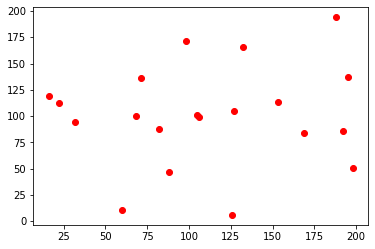

In [300]:
import random
import numpy as np
import matplotlib.pyplot as plt

nb_ville = 20
points = []

abscisses = random.sample(range(0,200), nb_ville)
ordonnees = random.sample(range(0,200), nb_ville)
points += [(a,b) for a,b in zip(abscisses,ordonnees)]

x = np.array(abscisses)
y = np.array(ordonnees)
plt.scatter(x,y, c="red")
plt.show()

## 4. Exploitation

## Conclusion